In [19]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import glob
import PIL
from sklearn.model_selection import train_test_split

In [20]:

civs_path = 'photos'


In [21]:

path  = civs_path

paths = glob.glob(path + "/*.jpg") # Grabbing all the image file names

n_images = len(paths)

rand_idxs = np.random.permutation(n_images)

paths_subset = np.random.choice(paths, n_images , replace=False) 
all_paths    = paths_subset[rand_idxs]

print(n_images)


30


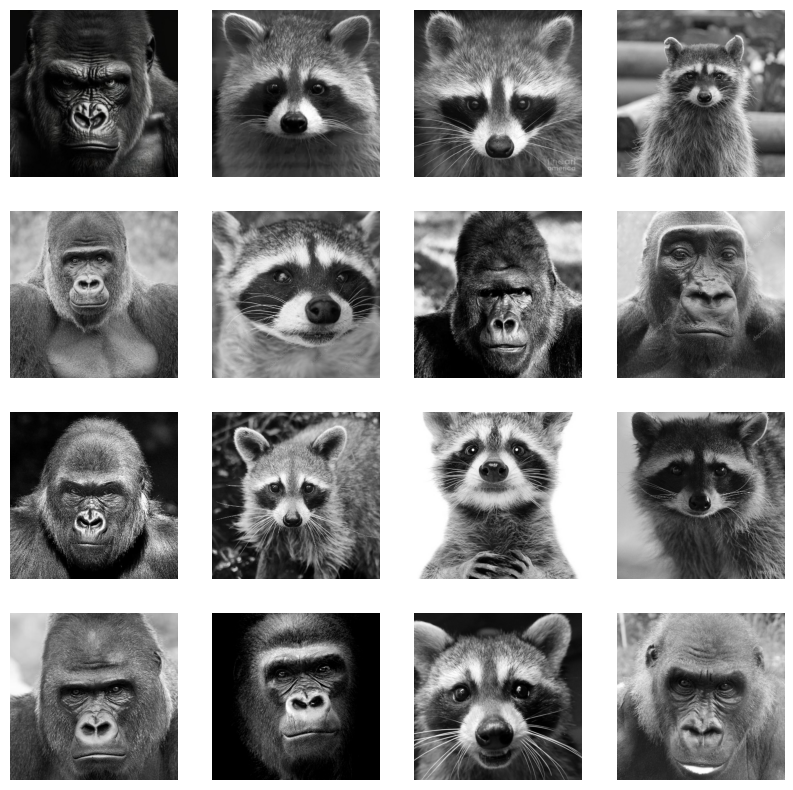

In [22]:

_, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), all_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")


In [24]:

def label_func2(fname):
    ## print(fname)
    fname = fname.replace("photos","")
    temp_name = fname.replace(".jpg", "").split("_")
    ## print(temp_name)
    
  
    y0 = temp_name[0]                              ## tg
    y1 = float(temp_name[1].replace("FMD", ""))     ##  Facial Mask Darkness
    y2 = float(temp_name[2].replace("NS", ""))    ## Nose Shape 
    y3 = float(temp_name[3].replace("EyS", ""))     ## Eye Shape
    y4 = float(temp_name[4].replace("EaS", ""))    ## Ear Shape
    y5 = float(temp_name[5].replace("LS", ""))     ## Lip Size
    
 
    ## np.array([y0, y1, y2, y3, y4, y5 ])
    return [fname, y0, y1, y2, y3, y4, y5 ]


In [25]:
list_imgs = []
list_label_vectors = []
i = 0

for img_name in all_paths:
    temp_label_vector_rc = label_func2(img_name)
    
    print("Image path:", img_name)
    print("Label vector:", temp_label_vector_rc)
    
    my_img = Image.open(img_name)

    my_img = ImageOps.grayscale(my_img)

    img_np = np.array(my_img)
    
    list_imgs.append(img_np)
    list_label_vectors.append(temp_label_vector_rc)


Image path: photos\22_FMD5_NS6_EyS4_EaS4_LS8.jpg
Label vector: ['\\22_FMD5_NS6_EyS4_EaS4_LS8.jpg', '\\22', 5.0, 6.0, 4.0, 4.0, 8.0]
Image path: photos\21_FMD5_NS5_EyS6_EaS7_LS1.jpg
Label vector: ['\\21_FMD5_NS5_EyS6_EaS7_LS1.jpg', '\\21', 5.0, 5.0, 6.0, 7.0, 1.0]
Image path: photos\8_FMD3_NS5_EyS6_EaS6_LS0.jpg
Label vector: ['\\8_FMD3_NS5_EyS6_EaS6_LS0.jpg', '\\8', 3.0, 5.0, 6.0, 6.0, 0.0]
Image path: photos\12_FMD4_NS2_EyS3_EaS3_LS1.jpg
Label vector: ['\\12_FMD4_NS2_EyS3_EaS3_LS1.jpg', '\\12', 4.0, 2.0, 3.0, 3.0, 1.0]
Image path: photos\1_FMD1_NS3_EyS2_EaS0_LS4.jpg
Label vector: ['\\1_FMD1_NS3_EyS2_EaS0_LS4.jpg', '\\1', 1.0, 3.0, 2.0, 0.0, 4.0]
Image path: photos\26_FMD7_NS6_EyS5_EaS4_LS5.jpg
Label vector: ['\\26_FMD7_NS6_EyS5_EaS4_LS5.jpg', '\\26', 7.0, 6.0, 5.0, 4.0, 5.0]
Image path: photos\28_FMD8_NS5_EyS3_EaS2_LS6.jpg
Label vector: ['\\28_FMD8_NS5_EyS3_EaS2_LS6.jpg', '\\28', 8.0, 5.0, 3.0, 2.0, 6.0]
Image path: photos\11_FMD3_NS10_EyS6_EaS0_LS8.jpg
Label vector: ['\\11_FMD3_NS10_E

In [26]:
print("Number of image paths found:", len(all_paths))
X =  list_imgs
y =  list_label_vectors 


Number of image paths found: 30


In [27]:
print("Length of X:", len(X))
print("Length of y:", len(y))
if len(list_imgs) == 0 or len(list_label_vectors) == 0:
    print("Error: Dataset is empty. Make sure data is loaded correctly.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    #######################################################

    print(len(X_train))
    print(len(X_test))
    print(len(y_train)) 
    print(len(y_test))
    
list_ids_train = []
list_imgs_train = []

for index in range(len(X_train)):
    print("Processing index:", index)
    
    # image target (label)
    reg_vals = y_train[index]
    print("Reg_vals:", reg_vals)
    
    # image data, normalized from 0-255 to 0-1
    single_np_img = X_train[index]
    print("Image shape:", single_np_img.shape)
    
    # Append data to lists
    list_ids_train.append(reg_vals[0])
    list_imgs_train.append(single_np_img)
    
# Check the length of list_imgs_train
print("Length of list_imgs_train:", len(list_imgs_train))


Length of X: 30
Length of y: 30
24
6
24
6
Processing index: 0
Reg_vals: ['\\17_FMD4_NS6_EyS5_EaS1_LS6.jpg', '\\17', 4.0, 6.0, 5.0, 1.0, 6.0]
Image shape: (400, 400)
Processing index: 1
Reg_vals: ['\\16_FMD4_NS5_EyS3_EaS6_LS2.jpg', '\\16', 4.0, 5.0, 3.0, 6.0, 2.0]
Image shape: (400, 400)
Processing index: 2
Reg_vals: ['\\15_FMD4_NS5_EyS3_EaS2_LS6.jpg', '\\15', 4.0, 5.0, 3.0, 2.0, 6.0]
Image shape: (400, 400)
Processing index: 3
Reg_vals: ['\\22_FMD5_NS6_EyS4_EaS4_LS8.jpg', '\\22', 5.0, 6.0, 4.0, 4.0, 8.0]
Image shape: (400, 400)
Processing index: 4
Reg_vals: ['\\1_FMD1_NS3_EyS2_EaS0_LS4.jpg', '\\1', 1.0, 3.0, 2.0, 0.0, 4.0]
Image shape: (400, 400)
Processing index: 5
Reg_vals: ['\\4_FMD2_NS3_EyS3_EaS4_LS2.jpg', '\\4', 2.0, 3.0, 3.0, 4.0, 2.0]
Image shape: (400, 400)
Processing index: 6
Reg_vals: ['\\26_FMD7_NS6_EyS5_EaS4_LS5.jpg', '\\26', 7.0, 6.0, 5.0, 4.0, 5.0]
Image shape: (400, 400)
Processing index: 7
Reg_vals: ['\\10_FMD3_NS7_EyS6_EaS0_LS9.jpg', '\\10', 3.0, 7.0, 6.0, 0.0, 9.0]
Im

In [28]:
X_train[0]

array([[223, 223, 223, ..., 221, 222, 222],
       [222, 222, 222, ..., 219, 220, 221],
       [222, 222, 222, ..., 218, 219, 221],
       ...,
       [232, 233, 233, ..., 125,  62,  67],
       [233, 233, 233, ..., 117,  84,  72],
       [233, 234, 234, ..., 135, 123,  67]], dtype=uint8)

In [29]:

list_features_train = []


print("Length of y_train:", len(y_train))

# Check Data Annotation and Inspect y_train
print("Structure and contents of y_train:")
for item in y_train:
    print(item)

for index in range(len(X_train)):
    # image target (label)
    reg_vals = y_train[index]
    
    # Check if reg_vals has at least 12 elements
    if len(reg_vals) >= 12:
        target = np.zeros((10))
        target[0] = reg_vals[2]
        target[1] = reg_vals[3]
        target[2] = reg_vals[4]
        target[3] = reg_vals[5]
        target[4] = reg_vals[6]
        target[5] = reg_vals[7]
        target[6] = reg_vals[8]
        target[7] = reg_vals[9]
        target[8] = reg_vals[10]
        target[9] = reg_vals[11]

        # image data, normalised from 0-255 to 0-1
        single_np_img = X_train[index]

        list_ids_train.append(reg_vals[0])
        list_imgs_train.append(single_np_img)
        list_features_train.append(target)

Length of y_train: 24
Structure and contents of y_train:
['\\17_FMD4_NS6_EyS5_EaS1_LS6.jpg', '\\17', 4.0, 6.0, 5.0, 1.0, 6.0]
['\\16_FMD4_NS5_EyS3_EaS6_LS2.jpg', '\\16', 4.0, 5.0, 3.0, 6.0, 2.0]
['\\15_FMD4_NS5_EyS3_EaS2_LS6.jpg', '\\15', 4.0, 5.0, 3.0, 2.0, 6.0]
['\\22_FMD5_NS6_EyS4_EaS4_LS8.jpg', '\\22', 5.0, 6.0, 4.0, 4.0, 8.0]
['\\1_FMD1_NS3_EyS2_EaS0_LS4.jpg', '\\1', 1.0, 3.0, 2.0, 0.0, 4.0]
['\\4_FMD2_NS3_EyS3_EaS4_LS2.jpg', '\\4', 2.0, 3.0, 3.0, 4.0, 2.0]
['\\26_FMD7_NS6_EyS5_EaS4_LS5.jpg', '\\26', 7.0, 6.0, 5.0, 4.0, 5.0]
['\\10_FMD3_NS7_EyS6_EaS0_LS9.jpg', '\\10', 3.0, 7.0, 6.0, 0.0, 9.0]
['\\19_FMD5_NS4_EyS3_EaS4_LS1.jpg', '\\19', 5.0, 4.0, 3.0, 4.0, 1.0]
['\\18_FMD4_NS8_EyS6_EaS0_LS10.jpg', '\\18', 4.0, 8.0, 6.0, 0.0, 10.0]
['\\21_FMD5_NS5_EyS6_EaS7_LS1.jpg', '\\21', 5.0, 5.0, 6.0, 7.0, 1.0]
['\\8_FMD3_NS5_EyS6_EaS6_LS0.jpg', '\\8', 3.0, 5.0, 6.0, 6.0, 0.0]
['\\23_FMD5_NS7_EyS3_EaS0_LS5.jpg', '\\23', 5.0, 7.0, 3.0, 0.0, 5.0]
['\\12_FMD4_NS2_EyS3_EaS3_LS1.jpg', '\\12', 4.0, 2

In [36]:

list_imgs_train[0]


array([[223, 223, 223, ..., 221, 222, 222],
       [222, 222, 222, ..., 219, 220, 221],
       [222, 222, 222, ..., 218, 219, 221],
       ...,
       [232, 233, 233, ..., 125,  62,  67],
       [233, 233, 233, ..., 117,  84,  72],
       [233, 234, 234, ..., 135, 123,  67]], dtype=uint8)

In [37]:

conditions_matrix_train = np.array( list_features_train )
conditions_matrix_test  = np.array( list_features_test )


In [71]:

print( conditions_matrix_train.shape )
print( conditions_matrix_test.shape  )


(0,)
(0,)



## Save data for deployment


In [39]:

DF_conditions_train = pd.DataFrame(conditions_matrix_train)
DF_conditions_train.to_csv("PD_conditions_train.csv")


In [40]:

DF_ids_train = pd.DataFrame(list_ids_train)
DF_ids_train.to_csv("PD_ids_train.csv")


In [41]:

list_imgs_train[17]


array([[ 31,  32,  33, ...,   5,   5,   5],
       [ 32,  32,  33, ...,   6,   5,   5],
       [ 32,  33,  33, ...,   6,   6,   5],
       ...,
       [124, 118,  94, ...,  44,  41,  40],
       [137, 105,  70, ...,  40,  34,  33],
       [ 97,  69,  82, ...,  39,  37,  32]], dtype=uint8)

In [42]:

list_imgs_train[17].shape


(400, 400)

In [43]:

list_imgs_train_stretched = [     the_img_np.reshape(-1)         for the_img_np in list_imgs_train ]


In [44]:

list_imgs_train_stretched[0]


array([223, 223, 223, ..., 135, 123,  67], dtype=uint8)

In [45]:

list_imgs_train_stretched[4].shape


(160000,)

In [46]:

list_imgs_train_stretched[4][:1000]


array([141, 147, 148, 149, 154, 156, 157, 160, 160, 160, 163, 169, 173,
       176, 175, 178, 178, 177, 175, 172, 169, 166, 163, 161, 160, 158,
       156, 154, 150, 150, 148, 149, 148, 146, 148, 147, 147, 147, 149,
       151, 151, 153, 151, 151, 152, 153, 152, 152, 147, 147, 141, 137,
       133, 129, 126, 126, 125, 124, 124, 125, 126, 128, 128, 127, 128,
       132, 131, 131, 131, 133, 132, 133, 134, 137, 139, 143, 145, 148,
       149, 152, 153, 154, 159, 160, 165, 168, 172, 174, 177, 178, 179,
       178, 176, 176, 173, 171, 168, 166, 162, 167, 157, 160, 166, 154,
       164, 149, 137, 129, 113, 123, 140, 137, 148, 141, 135, 145, 128,
       137, 124, 127, 132, 127, 122, 131, 126, 147, 128, 132, 132, 127,
       115, 116, 126, 134, 132, 126, 127, 127, 114, 122, 110, 114, 119,
       101, 107, 108, 123, 109, 100, 117, 107, 106,  99, 100, 108, 118,
       109, 112,  95, 105, 109, 104, 101,  98,  87, 100,  97, 116,  90,
        94, 100, 105,  95,  92, 110, 106, 110, 108, 103, 109,  8

In [47]:

list_imgs_train_stretched[7].shape


(160000,)


## Keeps scale at 0..255


In [64]:

np_list_imgs_train_stretched = np.array( list_imgs_train_stretched )  


In [65]:

np_list_imgs_train_stretched.shape


(24, 160000)

In [66]:

np_list_imgs_train_stretched[3]


array([ 9,  9,  9, ..., 10,  6,  5], dtype=uint8)

In [67]:

DF_imgs_np_train = pd.DataFrame(np_list_imgs_train_stretched)


In [68]:

DF_imgs_np_train


,0,1,2,3,4,5,6,7,8,9,...,159990,159991,159992,159993,159994,159995,159996,159997,159998,159999
0,223,223,223,222,221,221,221,220,221,221,...,82,81,77,96,119,140,137,135,123,67
1,7,9,8,11,8,8,6,7,9,11,...,130,138,142,147,155,161,165,164,160,160
2,216,215,215,215,215,216,216,216,218,218,...,51,50,54,44,39,45,48,39,36,39
3,9,9,9,9,9,9,9,9,9,9,...,5,7,8,11,17,19,20,10,6,5
4,141,147,148,149,154,156,157,160,160,160,...,34,28,60,45,51,60,61,62,51,67
5,0,0,0,0,0,0,0,0,0,0,...,164,162,152,152,163,167,175,174,174,184
6,83,102,128,155,173,183,190,197,205,211,...,131,132,131,130,132,131,132,134,130,131
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,193,192,192,193,194,193,194,195,195,195,...,163,148,120,139,163,171,172,156,146,133
9,0,0,0,0,0,0,0,0,0,0,...,12,18,25,16,16,30,34,46,66,43


In [69]:

DF_imgs_np_train.to_csv("PD_imgs_np_train.csv")



## Follow Web tool logic


In [72]:


url1 = "PD_ids_train.csv"
pd_ids_train = pd.read_csv(url1)
pd_ids_train_np = pd_ids_train.to_numpy()
pd_ids_train_np = pd_ids_train_np[1:, 1:]


FileNotFoundError: [Errno 2] No such file or directory: 'PD_ids_train.csv'

In [ ]:

url2 = "PD_conditions_train.csv"
pd_conditions_train = pd.read_csv(url2)
pd_conditions_train_np = pd_conditions_train.to_numpy()
pd_conditions_train_np   = pd_conditions_train_np[1:, 1:]


In [ ]:


url3 = "PD_imgs_np_train.csv"
pd_imgs_np_train = pd.read_csv(url3)
pd_imgs_np_train_np = pd_imgs_np_train.to_numpy()
pd_imgs_np_train_np      = pd_imgs_np_train_np[1:, 1:]




## KNN part


In [57]:

def euclidean_distance(v1, v2):
    return np.sqrt( np.sum(   (v1 - v2)**2   )   )



In [58]:

def predict(test_x):
    
    ## calculate distances between test_x and all dta samples in x
    ## this distances vector is a vector of 45 distances
    ## distances = [ euclidean_distance(test_x , x)  for x in X_train    ]

    distances = [ euclidean_distance(test_x, x )  for x in pd_conditions_train_np  ]
      
    
    ## distances - > [23, 3, 145, 17, ...]
    
    k = 3
    
    ## sort by distance value and return the k nearest neighbors
    ## np.argsort returns the indices of the k neares neighbors
    k_neighbor_indices = np.argsort(distances)[:k]
    print(k_neighbor_indices)
    
    
    ## with indices, extract labels from y_train 
    selected_imgs_to_avg = [ pd_imgs_np_train_np[i] for i in k_neighbor_indices  ]
    

    return selected_imgs_to_avg


In [62]:

np.set_printoptions(suppress=True)
print( conditions_matrix_test[:10, :] )
print(conditions_matrix_test.shape)


(0,)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:

def generate_img_per_index(index):
    
    selected_imgs_to_avg = predict( conditions_matrix_test[  index  ] )
    the_test_conditions = conditions_matrix_test[  index  ]
    
    
    avg_gen_img = np.mean( np.array(selected_imgs_to_avg), axis=0 )
    avg_gen_img = avg_gen_img.astype(int)
    gen_pil_image = avg_gen_img
    
    real_my_img = np.array(list_imgs_test[index])
    real_pil_image = Image.fromarray(real_my_img)
    real_pil_image = ImageOps.grayscale(real_pil_image)
    
    print(gen_pil_image)
    print(real_pil_image)
    
    return the_test_conditions, gen_pil_image, real_pil_image


In [ ]:

the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(17)


the_test_conditions = the_test_conditions.astype(int)
str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
str_conditions = str_conditions.replace(" ","")
str_conditions = str_conditions.replace("[","")
str_conditions = str_conditions.replace("]","")

## print(str_conditions)
                 

fig, ax = plt.subplots(1,2)

ax[0].imshow(gen_pil_image)
ax[1].imshow(real_pil_image)

ax[0].set_title("Gen: " + str_conditions)
ax[1].set_title("real")


In [ ]:

for test_i in range( conditions_matrix_test.shape[0]  ):


    the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(test_i)
    
    the_test_conditions = the_test_conditions.astype(int)
    str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
    str_conditions = str_conditions.replace(" ","")
    str_conditions = str_conditions.replace("[","")
    str_conditions = str_conditions.replace("]","")

    ## print(str_conditions)

    fig, ax = plt.subplots(1,2)
    ax[0].imshow(gen_pil_image)
    ax[1].imshow(real_pil_image)
    
    ax[0].set_title("Gen: " + str_conditions)
    ax[1].set_title("real")
